# Data pre-processing & Data Cleaning

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
url = 'flowSunJun115.csv'
df = pd.read_csv(url)

In [22]:
print(df['Tag']) #Normal & Attack are the Tag/Labels
df.shape

0          Normal
1          Normal
2          Normal
3          Normal
4          Normal
           ...   
275523     Normal
275524     Normal
275525     Normal
275526     Normal
275527     Normal
Name: Tag, Length: 275528, dtype: object


(275528, 20)

In [23]:
df.columns

Index(['appName', 'source', 'protocolName', 'sourcePort', 'destination',
       'destinationPort', 'direction', 'totalSourceBytes',
       'totalDestinationBytes', 'totalDestinationPackets',
       'totalSourcePackets', 'sourcePayloadAsBase64', 'sourcePayloadAsUTF',
       'destinationPayloadAsBase64', 'destinationPayloadAsUTF',
       'sourceTCPFlagsDescription', 'destinationTCPFlagsDescription',
       'startDateTime', 'stopDateTime', 'Tag'],
      dtype='object')

In [24]:
tag = df['Tag']
tag.value_counts() # White Spaces in Tag Label & NaN


 Normal    247139
 Attack     19787
             8546
 0             56
Name: Tag, dtype: int64

## Removing Empty Spaces in 'Tag' Label

In [49]:
import threading

'''  
    Preprocessor class:
    this is the class which will be used to manipulate our data. 
    ->self.df; is the member; in which the dataframe will be loaded. 
    -> Preprocessor: is used to clean & pre-process our data. 

'''

class Preprocessor:
    
    def __init__(self, csv_path='flowSunJun115.csv'):
        self.df = pd.read_csv(csv_path) #Reading the csv file pn creation & loading it in dataframe.
    
    def get_df(self):#Returns DataFrame
        return self.df 
    
    def drop_outlier(self, outliers): #Will be used to Remove repeated values & outliers; 
        print("Removing indexes : ",outliers ) #helper function for outlier_remover
        self.df.drop(outliers, inplace=True) #inplace = True; Manipulate inside the current df, 
        print("Removed outliers !")                 #^ don't make a new df, ^
        print(self.df.shape)

    def rem_space(self, valToRemove1,valToRemove2): #REMOVE_space or whatever, passed in param1 & param2
        valToRemove1 = str(valToRemove1)  #Will get List of indexes of where valToRemove1 & valToRemove2 are situated. 
        valToRemove2 = str(valToRemove2)
        df = self.get_df()
        outlier_indexes = df.loc[df['Tag'].isin([valToRemove1,valToRemove2])].index #Extract Rows w var1,var2 in em
        print(type(outlier_indexes[0]))
        print((outlier_indexes[0]))
        return outlier_indexes       #Returns a list of indexes to remove
    
    def shape(self): #Returns Shape
        return self.df.shape
    
    def outlier_remover(self):
        """
            Extracts indexes of outlier rows and
            sends them to be removed.
        """
        outlier_list = self.rem_space(' ', '0') 
        print("Outliers Count : ",len(outlier_list))
        self.drop_outlier(outlier_list)
        print("[*] Done !\nNew shape : ",self.df.shape)
        
    def attackNormalVisualize(self): #Will visualize barplot
        %matplotlib inline
        tag = self.df['Tag']
        tag.value_counts().plot(kind='bar')# White Spaces in Tag Label & NaN; as shown in barplot
        print(tag.value_counts()[0])
        plt.ylabel('Frequency')
        plt.xlabel('Labels/Tags of Network Packets');
        plt.title("captured network packets")
        plt.show()
    
        
    def tagZeroRemoval(self):
        ''' 
            Will drop rows with false 'Tag' label; which can be spaces or null values 
        '''
        zeroOutliers = self.df.loc[self.df['Tag'].isin(['0 ', ' 0',' '])].index
        print(zeroOutliers) 
        self.df = self.df.drop(zeroOutliers) 
        
    def attackProbability(self):
        ''' 
           Attack frequency / (AttackFrequency + NormalFrequency) 
        '''
        df_tag = self.df['Tag']
        df_tag.value_counts()
        Attack_count = df_tag.value_counts()[1]
        Benign_count = df_tag.value_counts()[0]
        TotalOutcomes = (Attack_count + Benign_count)
        Attack_proba = ((Attack_count / (TotalOutcomes)) )

        print(Attack_count ,'/', Attack_count + Benign_count, ', Attack_count:',Attack_count,'Benign_count:',Benign_count)
        print(Attack_proba, 'Probability of Attack')
#         return Attack_proba

    def fill_NA(self):
        """
            Replace coloumn values with a null value 
            if the column value is N/A. We can change
            the columns later, on whicb the rows have 
            to be replaced .
        """
        self.df = self.df.fillna(0)
        self.df['sourceTCPFlagsDescription'] = df['sourceTCPFlagsDescription'].replace('N/A', 0)
        self.df['destinationTCPFlagsDescription'] = df['destinationTCPFlagsDescription'].replace('N/A', 0)
#         print('?')
        return self.df

    def getTagValues(self):
        """
            Return tag label counts
        """
        TagValues = self.df['Tag']
        return TagValues.value_counts()
    
    def scatter_plot(self):
        """
            Visulize scatter plot
        """
        plt.figure(figsize=(10, 5)) 
        
        x =  range(self.df['Tag'].size)
        y =  self.df['destinationPayloadAsUTF']
        plt.scatter(x, y, marker='x', s=3.35)
        plt.title("Relationship between Malicious & Benign Activity")
        plt.xlabel("Packet Arrival Order")
        plt.ylabel("Labels")

        plt.show()
        
        
    def dropCertainColumns(self):
        """
           Rwmove some more unnecessary data. 
        """
        self.df = self.df.drop(columns=['totalSourcePackets','totalDestinationPackets','startDateTime','stopDateTime'])
        return self.df

    
 

        

In [50]:
# df.loc[df['Tag'].isin([' ','0'])].index

In [55]:
pp = Preprocessor()

pp.shape()
# pp.outlier_remover()
pp.df.head()
# pp.attackNormalVisualize()
# pp.tagZeroRemoval()
# pp.attackNormalVisualize()

,appName,source,protocolName,sourcePort,destination,destinationPort,direction,totalSourceBytes,totalDestinationBytes,totalDestinationPackets,totalSourcePackets,sourcePayloadAsBase64,sourcePayloadAsUTF,destinationPayloadAsBase64,destinationPayloadAsUTF,sourceTCPFlagsDescription,destinationTCPFlagsDescription,startDateTime,stopDateTime,Tag
0,Unknown_UDP,192.168.5.122,udp_ip,5353,224.0.0.251,5353,L2R,2633658,0,0,28971,0,0,0,0,N/A,N/A,2010-06-12T23:57:24,2010-06-13T09:24:52,Normal
1,Unknown_UDP,192.168.5.122,udp_ip,5353,224.0.0.251,5353,L2R,2633658,0,0,28971,0,0,0,0,N/A,N/A,2010-06-12T23:57:24,2010-06-13T09:24:52,Normal
2,HTTPWeb,192.168.2.113,tcp_ip,4191,192.168.5.122,80,L2L,64,128,2,1,0,0,0,0,F A,R,2010-06-12T23:57:38,2010-06-12T23:59:20,Normal
3,HTTPWeb,192.168.2.113,tcp_ip,4191,192.168.5.122,80,L2L,64,128,2,1,0,0,0,0,F A,R,2010-06-12T23:57:38,2010-06-12T23:59:20,Normal
4,HTTPWeb,192.168.2.113,tcp_ip,4192,207.241.148.80,80,L2R,128,64,1,2,0,0,0,0,F A,F A,2010-06-12T23:57:40,2010-06-12T23:59:20,Normal


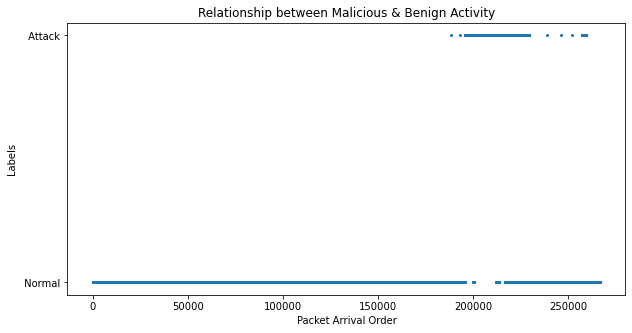

In [52]:
# pp.outlier_remover()
# tag = df['Tag']
# pp.tagZeroRemoval()
# pp.attackProbability()
# pp.fill_NA()
# pp.getTagValues()
pp.scatter_plot()
# pp.dropCertainColumns()
# pp.attackNormalVisualize()


In [130]:
rem_space(df,' ', '0')

<class 'numpy.int64'>
73750


Int64Index([ 73750,  73781,  73814,  73849,  73881,  73915,  73949,  73983,
             74018,  74052,
            ...
            275265, 275292, 275320, 275350, 275380, 275410, 275434, 275460,
            275487, 275515],
           dtype='int64', length=6239)

In [85]:
df.shape

(275528, 20)

## TFIDF

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
df1 = df.drop(columns=['Tag'])
# df1 = df1.drop
# df1.head()
tfidf = TfidfVectorizer()
matrix_input = tfidf.fit_transform(df1)
matrix_input

<19x19 sparse matrix of type '<class 'numpy.float64'>'
	with 19 stored elements in Compressed Sparse Row format>

## KMeans Clustering 

In [61]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 10)
# print(km)
km.fit(matrix_input)
km.labels_

array([0, 2, 0, 5, 1, 0, 0, 0, 0, 7, 0, 3, 8, 4, 0, 9, 6, 0, 0])

In [113]:
# kmeans = KMeans(n_clusters=5, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
# y_kmeans = kmeans.fit_predict(matrix_input)
# plt.scatter(matrix_input[y_kmeans==0, 0], matrix_input[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
# plt.scatter(matrix_input[y_kmeans==1, 0], matrix_input[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
# plt.scatter(matrix_input[y_kmeans==2, 0], matrix_input[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
# plt.scatter(matrix_input[y_kmeans==3, 0], matrix_input[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 4')
# plt.scatter(matrix_input[y_kmeans==4, 0], matrix_input[y_kmeans==4, 1], s=100, c='magenta', label ='Cluster 5')


# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
# plt.title('Clusters of Customers')
# plt.xlabel('Annual Income(k$)')
# plt.ylabel('Spending Score(1-100')
# plt.show()